In [107]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

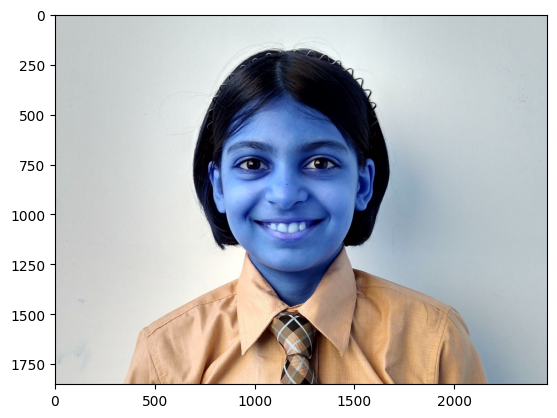

In [14]:
img = cv2.imread("/Users/shrutikarandikar/development/Shruti.jpg")
plt.imshow(img)

In [14]:
print(type(img))
print(img.shape)
print(img.ndim)
print(img.size)
print(img.dtype)


<class 'numpy.ndarray'>
(1851, 2467, 3)
3
13699251
uint8


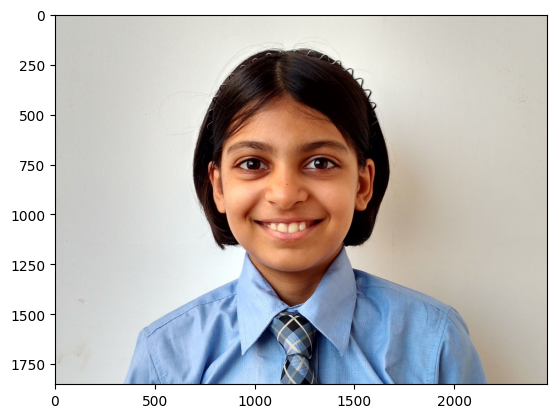

In [44]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [46]:
a = np.zeros([img.shape[0]//2, img.shape[1]//2 , 3],dtype = "uint8") 
rows = img.shape[0]
cols = img.shape[1]
print(rows, cols)
for r in range(rows):
    if r // 2 == a.shape[0]:
        break
    if r % 2 == 0:
        for c in range(cols):
            if c // 2 == a.shape[1]:
                break
            if c % 2 == 0:
                a[r//2, c//2] = img[r , c]

1851 2467


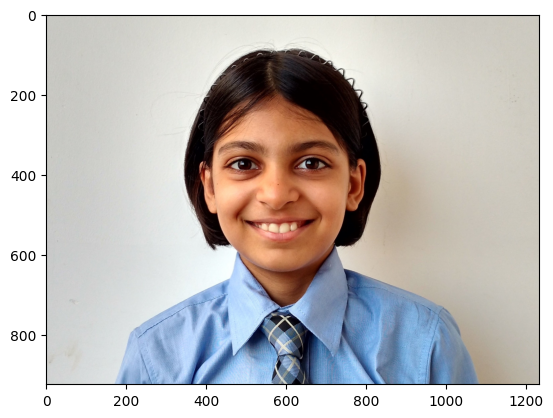

In [47]:
plt.imshow(a)

1. reduce the size of the image by 50% by manually selecting alternate rows and then alternate columns
2. do this (as below) using numpy
3. Then show how we can take the average of neighboring rows and columns to get a 'better' compressed picture

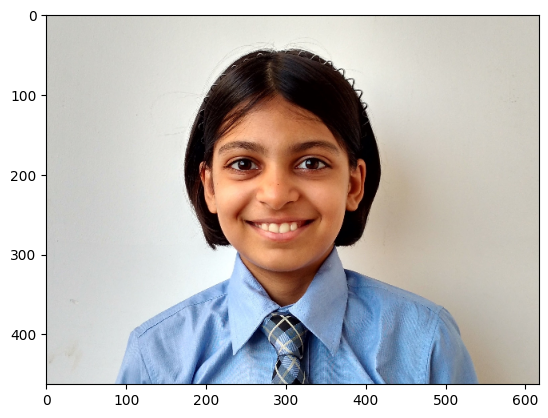

In [48]:
plt.imshow(a[::2, ::2,:])

Filters start here
the first is a blur - average of the pixel and the 8 surrounding ones
next try a 'center-weighted' filter - larger wt for center and smaller for the sorrounding ones

try it on a picture with a clear black/white separator

In [95]:
a = np.ones([3,3])
print(a)
a[0,0] = 0.5
a[0,2] = 0.5
a[2,0] = 0.5
a[2,2] = 0.5
a[1,1] = 2
print(a)


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0.5 1.  0.5]
 [1.  2.  1. ]
 [0.5 1.  0.5]]


In [98]:
newimage =  np.empty_like(img)
f = 9
for r in range(1, img.shape[0]-1):
    for c in range(1, img.shape[1]-1):
       
        newimage[r,c,0] = np.sum(img[r-1:r+2, c-1:c+2,0]*a)//f
        newimage[r,c,1] = np.sum(img[r-1:r+2, c-1:c+2,1]*a)//f
        newimage[r,c,2] = np.sum(img[r-1:r+2, c-1:c+2,2]*a)//f
    if r% 200 == 0:
        print("done with row",r)

done with row 200
done with row 400
done with row 600
done with row 800
done with row 1000
done with row 1200
done with row 1400
done with row 1600
done with row 1800


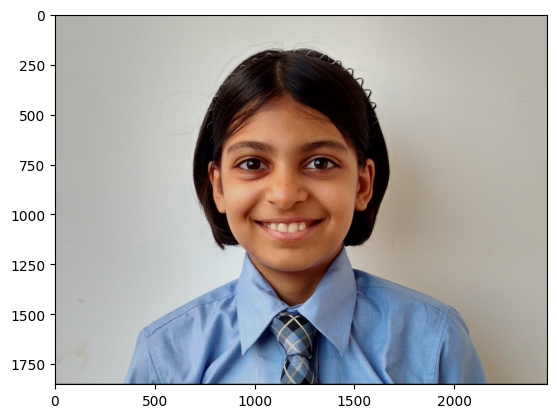

In [99]:
plt.imshow(newimage)

1. Make a function, that takes an image and a filter and returns the filtered image
2. generalize the function so that you can use a 5x5 or 7x7 filter
3. also apply the filter to the 1st/last row/column so that they are also processed (0 padding)

In [17]:
#The above code as a fucntion
def filter_image(img, filter, f=1):
    newimage = np.empty_like(img)
    
    for r in range(1, img.shape[0]-1):
        for c in range(1, img.shape[1]-1):
            
            newimage[r,c,0] = np.sum(img[r-1:r+2,c-1:c+2,0] * filter) // f
            newimage[r,c,1] = np.sum(img[r-1:r+2,c-1:c+2,1] * filter) // f
            newimage[r,c,2] = np.sum(img[r-1:r+2,c-1:c+2,2] * filter) // f
            
        if r % 200 == 0:
            print("Done with row:", r)
            
    return newimage

In [71]:
# Generalized function
#talk about overflow

def filter_image(img, filter, f=1):
    img = img.astype('float64')
    newimage = np.empty_like(img).astype('float64')
    #print("image shape: ", img.shape)
    #print("filter shape: ", filter.shape)
    d0 = filter.shape[0] // 2
    d1 = filter.shape[1] // 2
    
    for r in range(d0, img.shape[0]-d0):
        for c in range(d1, img.shape[1]-d1):
        
            newimage[r,c,0] = np.sum(img[r-d0:r+d0+1, c-d1:c+d1+1, 0] * filter) // f
            newimage[r,c,1] = np.sum(img[r-d0:r+d0+1, c-d1:c+d1+1, 1] * filter) // f
            newimage[r,c,2] = np.sum(img[r-d0:r+d0+1, c-d1:c+d1+1, 2] * filter) // f
            
        if r % 200 == 0:
            print("Done with row:", r)
            
    return newimage.astype('uint8')

Done with row: 200
Done with row: 400
Done with row: 600
Done with row: 800
Done with row: 1000
Done with row: 1200
Done with row: 1400
Done with row: 1600
Done with row: 1800


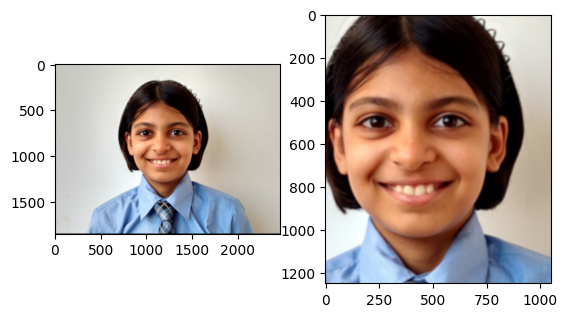

In [ ]:
# A filter of 11x11
a = np.ones([11,11])
b = filter_image(img, a, f=121)

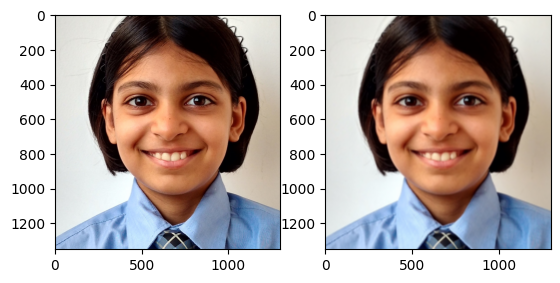

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img[250:1600, 500:1800])
ax2.imshow(b[250:1600, 500:1800]) 

The code above didnt work before. This is how I debugged it. I took a smaller array to see how it worked.

In [60]:
def filter_array(img, filter, f=1):
    img = img.astype('float64')
    newimage = np.empty_like(img).astype('float64')
    print("image shape: ", img.shape)
    print("filter shape: ", filter.shape)
    d0 = filter.shape[0] // 2
    b = filter.shape[1] // 2
    
    for r in range(d0, img.shape[0]-d0):
        for c in range(b, img.shape[1]-b):
        
            newimage[r,c] = np.sum(img[r-d0:r+d0+1, c-b:c+b+1] * filter) // f
            
        if r % 200 == 0:
            print("Done with row:", r)
            
    return newimage.astype('uint8')

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
image shape:  (5, 5)
filter shape:  (3, 3)
[[ 1  1  1  1  1]
 [ 1  6  7  8  1]
 [ 1 11 12 13  1]
 [ 1 16 17 18  1]
 [ 1  1  1  1  1]]


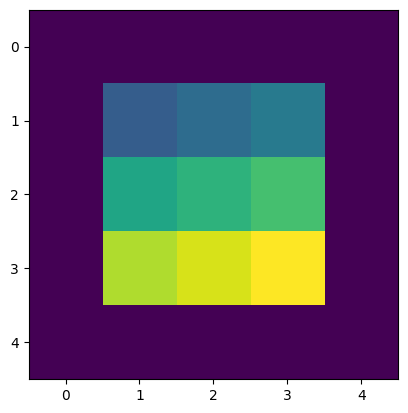

In [61]:
a = np.ones([3,3])
c = np.arange(25).reshape(5, 5)
print(a)
print(c)
b = filter_array(c, a, f=9)
print(b)
plt.imshow(b)

separate section -- zero padding v. ignoring the first/last column & row

In [88]:
# Filter to the 1st/last row/column so that they are also processed (0 padding)
def filter_image(img, filter, f=1):
    newimage = np.empty_like(img)
    
    d0 = filter.shape[0] // 2
    padded = np.pad(img, ((d0,d0), (d0,d0), (0,0)), mode='constant', constant_values=(0, 0))
    
    
    for r in range(d0, img.shape[0]-d0):
        for c in range(d0, img.shape[1]-d0):
            
            newimage[r,c,0] = np.sum(img[r-d0:r+d0+1, c-d0:c+d0+1, 0] * filter) // f
            newimage[r,c,1] = np.sum(img[r-d0:r+d0+1, c-d0:c+d0+1, 1] * filter) // f
            newimage[r,c,2] = np.sum(img[r-d0:r+d0+1, c-d0:c+d0+1, 2] * filter) // f
    #remove the padding
        
        if r % 200 == 0:
            print("Done with row:", r)
            
    return newimage


Done with row: 200
Done with row: 400
Done with row: 600
Done with row: 800
Done with row: 1000
Done with row: 1200
Done with row: 1400
Done with row: 1600
Done with row: 1800


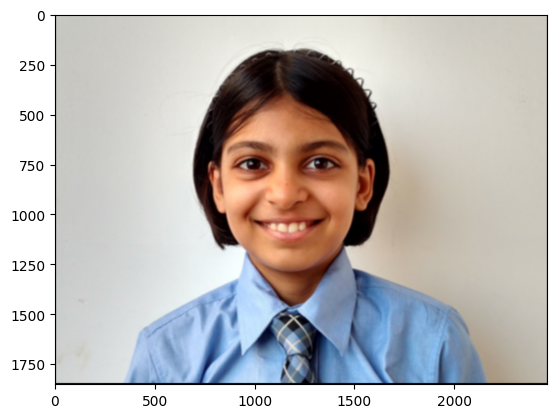

In [ ]:
a = np.ones([11,11])
b = filter_image(img, a, f=121)
plt.imshow(b)
1858

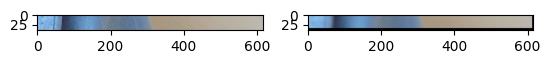

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img[1810:2420, 1851:2467])
ax2.imshow(b[1810:2420, 1851:2467]) 


# Part 2 - Geometric

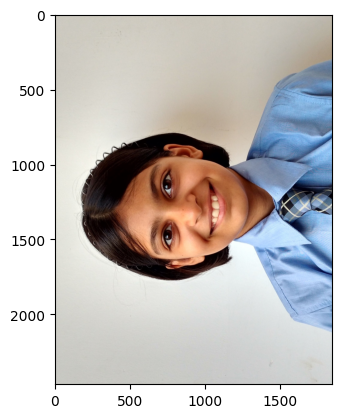

In [110]:
## Rotate 90 degrees
a = np.rot90(img)
plt.imshow(a)

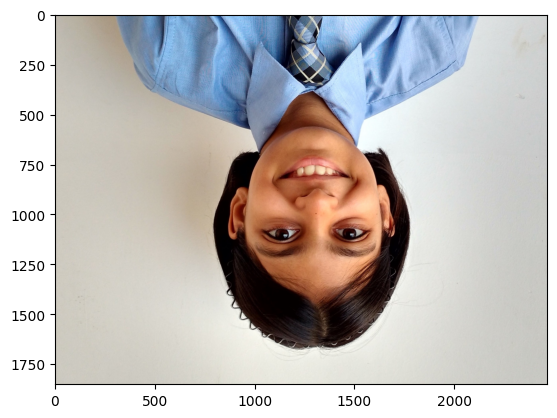

In [113]:
## Rotate 180 degrees
a = np.rot90(img)
b = np.rot90(a)
plt.imshow(b)

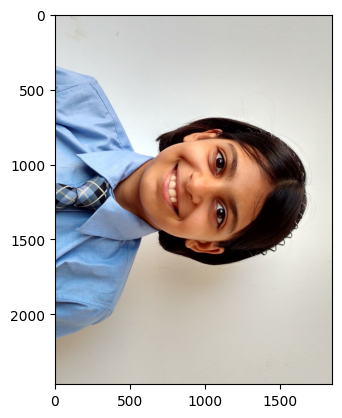

In [114]:
## Rotate 270 degrees
a = np.rot90(img)
b = np.rot90(a)
c = np.rot90(b)
plt.imshow(c)

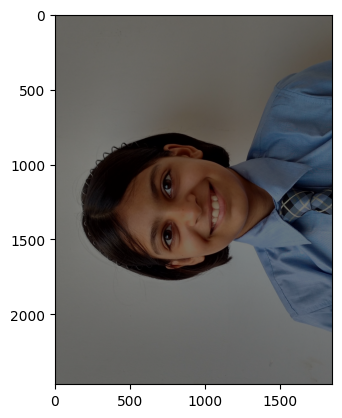

In [117]:
## Rotate 45 degrees

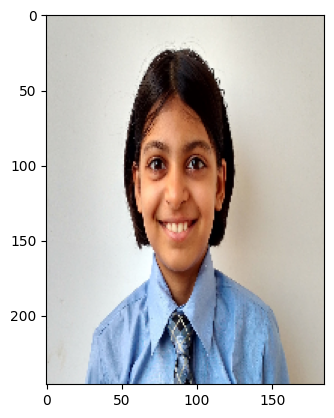

In [123]:
## Scaling img by 10%
resized_img = cv2.resize(img, (185, 246))
plt.imshow(resized_img)

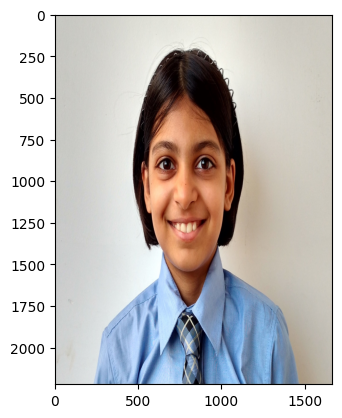

In [124]:
## Scaling img by 10%
resized_img = cv2.resize(img, (1665, 2220))
plt.imshow(resized_img)